Linear Regression for a Advertisement dataset

In [25]:
#importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [7]:
#reading the dataset
df = pd.read_csv('Advertising.csv')
print(df.shape)
print(df.index)
print(df.columns)
df.head()

(200, 5)
RangeIndex(start=0, stop=200, step=1)
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
#drop the Unnamed: 0 column as it's not required
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


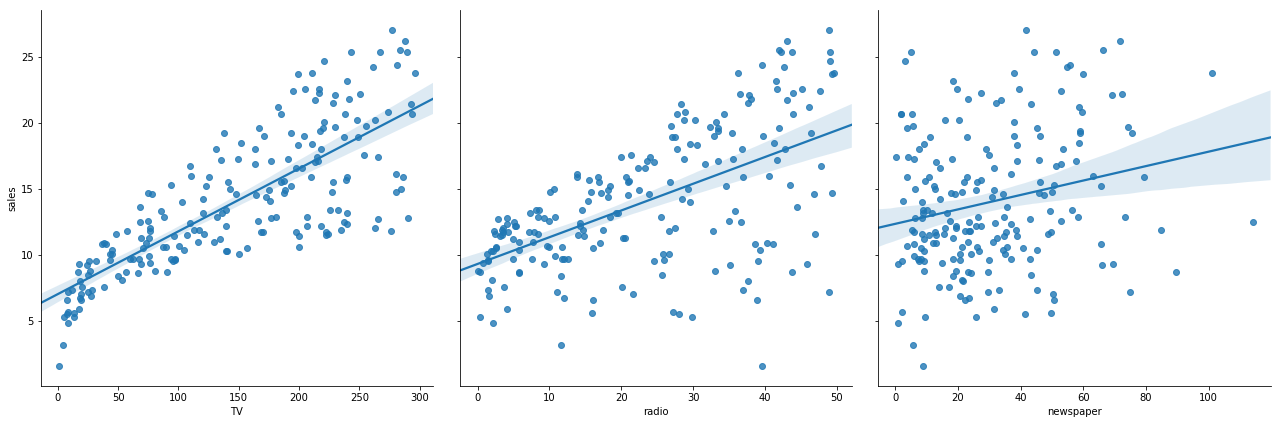

In [16]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', kind='reg', size=6)
#From this plot we could see that there is a linear relationship between tv and sales, radio and sales. 
# But newspaper data is more scattered and we can't see any linear relationship, so we don't feed this feature to our model

In [21]:
#creating input features 
X = df[['TV','radio']]
y = df['sales']
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [42]:
#Training the model using using train test split , fitting it and predicting test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape, '\n')

lin = LinearRegression() #instantiation
lin.fit(X_train, y_train)
pred = lin.predict(X_test)


print(lin.intercept_)
# print(lin.coef_)

dict(zip(X, lin.coef_))


(160, 2)
(40, 2)
(160,)
(40,) 

2.9475150360289977


{'TV': 0.046869974980173465, 'radio': 0.18000650373005056}

In [40]:
#Evaluating model
print(metrics.r2_score(pred, y_test))

print(np.sqrt(metrics.mean_squared_error(pred, y_test)))

#we got 1.39 error and 0.88 R squared value.

0.8859208748109552
1.3982924890777746
